In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow
import joblib

In [132]:
data=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\PROCESS_DATASET\crop_recommendation_processed.csv")

In [133]:
x,y=data.iloc[:,:-1],data.iloc[:,-1:]

In [134]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,PReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [136]:
len(np.unique(ytrain))

22

In [146]:
model=Sequential([
    Input(shape=(7,)),
    Dense(units=64,kernel_regularizer=l2(0.1)),
    PReLU(),
    Dense(units=22,activation='softmax')
])

In [147]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [148]:
stop=EarlyStopping(
    monitor='val_loss',
    verbose=1,
    min_delta=0.00001,
    restore_best_weights=True,
    patience=10
)

In [149]:
model_history=model.fit(xtrain,ytrain,epochs=100,batch_size=30,validation_data=(xtest,ytest),callbacks=stop)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1168 - loss: 4.0742 - val_accuracy: 0.3977 - val_loss: 3.3720
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4858 - loss: 3.1975 - val_accuracy: 0.5909 - val_loss: 2.8096
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6280 - loss: 2.6633 - val_accuracy: 0.6659 - val_loss: 2.4090
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6942 - loss: 2.3046 - val_accuracy: 0.6636 - val_loss: 2.1211
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 2.0200 - val_accuracy: 0.7682 - val_loss: 1.9024
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8069 - loss: 1.8297 - val_accuracy: 0.8114 - val_loss: 1.7464
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8049 - loss: 1.6828 - val_accuracy: 0.8318 - val_loss: 1.6229
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8443 - loss: 1.5613 - val_accuracy: 0.8364 - v

In [150]:
print("TRAINING ACCURACY: ",model.evaluate(xtrain,ytrain)[1]*100)
print("TESTING ACCURACY: ",model.evaluate(xtest,ytest)[1]*100)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9770 - loss: 0.3545
TRAINING ACCURACY:  98.23863506317139
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9569 - loss: 0.4048 
TESTING ACCURACY:  96.13636136054993


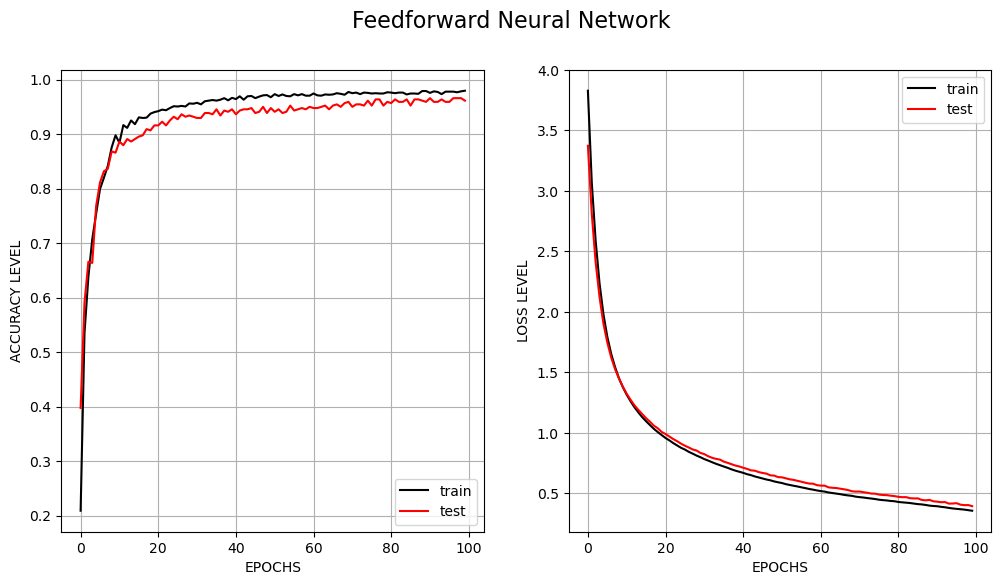

In [151]:
plt.figure(figsize=(12,6))
plt.suptitle("Feedforward Neural Network",fontsize=16)
plt.subplot(1,2,1)
plt.plot(model_history.history['accuracy'],color='Black')
plt.plot(model_history.history['val_accuracy'],color='Red')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY LEVEL")
plt.grid()
plt.legend(['train','test'])
plt.subplot(1,2,2)
plt.plot(model_history.history['loss'],color='Black')
plt.plot(model_history.history['val_loss'],color='Red')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS LEVEL")
plt.grid()
plt.legend(['train','test'])
plt.show()

In [153]:
joblib.dump(model,r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\MODELS\fnn.pkl")

['C:\\Users\\Avijit\\Desktop\\AgriAssure\\CROP_RECOMMENDATION\\MODELS\\fnn.pkl']